<h1>The Package Delivery Problem.</h1>

<p>A genetic algorithm used to solve the package delivery problem.<br>
    Using a GA <a href="https://pygad.readthedocs.io/en/latest/">PyGAD</a>: An Intuitive Genetic Algorithm Python Library by Ahmed Fawzy Gad, 2021.</p>

<p>Author: Colton Paquette, for COMP 3625: Artificial Intelligence<br>
Due Date: November 3, 2021</p>


<h3>Imports and global declarations</h3>

In [1]:
import pygad
import numpy
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime

global N


<h2>Problem Size</h2>
<p>maxpaths(n) determines the maximum number of possible delivery routes. This number is never used, but is here simply for demonstrative purposes.</p>

In [2]:
def maxpaths(n):
    return math.factorial(n - 1) / 2


<h2>A Solution and Fitness</h2>
<p>A solution will be a list of <em>N</em> numbers with a domain of 1 to <em>N</em>. <br>
    The solution, <em>S</em> = <em>[ s<sub>1</sub>, . . . , s<sub>N</sub> ]</em>, where <em>s<sub>i</sub></em> is the city.</p>
<p>The fitness function evaluates a solution by determining the sum of the distances between each city in the order provided. The fitness function assumes the route begins and ends at x = 0, y = 0. The lower the total distance, the fitter the solution. As pyGAD evaluates higher values as more fit, we invert our total distance to properly represent the fitness of the solution.</p>

In [3]:
# The initial solution is a randomized list containing values 1 to N 
def solution(): 
    sol = []
    for i in range(N):
        sol.append(1 + i)
    random.shuffle(sol)
    return sol

# Finds the Euclidean distance between two points
def e_dist(A, B):
    return math.sqrt((A['y'] - B['y'])**2 + (A['x'] - B['x'])**2)

# Sums the distance of all point consecutively.
# Adds the sum of the distance from (0,0) to solution[0], and solution[-1] to (0,0) afterward.
def distance( solution, solution_idx ):
    total_dist = 0
    for i in range(0, N-1):
        total_dist += e_dist(cities.loc[solution[i]], cities.loc[solution[i+1]])
    total_dist += e_dist({'x':0,'y':0}, cities.loc[solution[0]])
    total_dist += e_dist({'x':0,'y':0}, cities.loc[solution[-1]])
    return 1 / total_dist

# Prints a directional graph of the most fit delivery route.
def printsol(s): 
    figure(figsize=(16, 9), dpi=120)
    
    #plot (0,0) to S[0]
    plt.arrow(0,
              0, 
              cities.loc[s[0],'x']-0, 
              cities.loc[s[0],'y']-0, 
              head_width=0.2, head_length=0.6, fc='k', ec='k', length_includes_head = True)
    
    #plot delivery route
    for i in range(0, N-1):
        plt.arrow(cities.loc[s[i], 'x'],
        cities.loc[s[i],'y'], 
        cities.loc[s[i+1],'x']-cities.loc[s[i], 'x'], 
        cities.loc[s[i+1],'y']-cities.loc[s[i], 'y'], 
        head_width=0.2, head_length=0.6, fc='k', ec='k', length_includes_head = True)
    
    #plot S[-1] to (0,0)
    plt.arrow(cities.loc[s[-1], 'x'],
              cities.loc[s[-1],'y'], 
              0-cities.loc[s[-1], 'x'], 
              0-cities.loc[s[-1], 'y'], 
              head_width=0.2, head_length=0.6, fc='k', ec='k', length_includes_head = True)
    
    plt.title('Delivery Route')
    plt.show()

<h2>The Genetic Algorithm</h2> 

In [4]:
# Prints the generation, the time it complete, the fitness of the most fit solution, and said solution.
def on_generation(g):
    s, fit, s_i = g.best_solution()
    print(f'Gen: {g.generations_completed:}  \tFittest: {fit:.6f} \tDistance: {1/fit:.6f}')

# genetic algorithm 
def ga(): 
    fitness_function = distance
    
    # number of generations
    num_generations = 350

    # population size 
    sol_per_pop = 750

    num_genes = N
    gene_space = [i for i in range(1, N+1)]
    init_range_low = 1
    init_range_high = N+1

    # Genetic operators
    num_parents_mating = 2
    parent_selection_type = "rank" 
    keep_parents = 1                   
    crossover_type = "single_point"
    mutation_type = "random"
    mutation_percent_genes = 10
    
    ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       #init_range_low=init_range_low,
                       #init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       gene_space=gene_space,
                       on_generation=on_generation,
                       allow_duplicate_genes=False)
    ga_instance.run()
    
    ga_instance.plot_fitness()
    
    s, fit, s_i = ga_instance.best_solution()
    print("\nSmallest Distance:", 1/fit, "\nSolution:", s, "\n")
    return s

    

<h2>Main</h2>
<p>Loads city data from the provided csv file, creates an initial solution, and invokes the genetic algorithm</p>
<p>The output below displays the most fit solution per generation, and out puts a graph representing the fitness over time, as well as the delivery route</p>

Enter file name: tsp2.csv
Maximum number of routes for N = 50: 3.0414093201713376e+62

Starting Solution:
 [25, 1, 40, 30, 33, 19, 37, 32, 50, 21, 45, 5, 8, 14, 16, 20, 7, 4, 43, 17, 23, 29, 36, 34, 6, 49, 48, 24, 28, 10, 44, 35, 18, 42, 38, 22, 46, 47, 27, 41, 11, 9, 31, 13, 39, 2, 3, 15, 26, 12]

Gen: 1  	Fittest: 0.001485 	Distance: 673.353336
Gen: 2  	Fittest: 0.001595 	Distance: 626.936023
Gen: 3  	Fittest: 0.001681 	Distance: 595.053147
Gen: 4  	Fittest: 0.001744 	Distance: 573.480696
Gen: 5  	Fittest: 0.001778 	Distance: 562.564060
Gen: 6  	Fittest: 0.001869 	Distance: 534.992020
Gen: 7  	Fittest: 0.001922 	Distance: 520.203699
Gen: 8  	Fittest: 0.001984 	Distance: 503.980664
Gen: 9  	Fittest: 0.002064 	Distance: 484.453778
Gen: 10  	Fittest: 0.002117 	Distance: 472.353213
Gen: 11  	Fittest: 0.002172 	Distance: 460.363949
Gen: 12  	Fittest: 0.002199 	Distance: 454.779314
Gen: 13  	Fittest: 0.002236 	Distance: 447.207203
Gen: 14  	Fittest: 0.002252 	Distance: 443.953141
Gen: 15  

Gen: 158  	Fittest: 0.003812 	Distance: 262.326575
Gen: 159  	Fittest: 0.003821 	Distance: 261.717243
Gen: 160  	Fittest: 0.003795 	Distance: 263.534823
Gen: 161  	Fittest: 0.003819 	Distance: 261.850658
Gen: 162  	Fittest: 0.003782 	Distance: 264.416680
Gen: 163  	Fittest: 0.003812 	Distance: 262.326575
Gen: 164  	Fittest: 0.003809 	Distance: 262.519185
Gen: 165  	Fittest: 0.003804 	Distance: 262.865366
Gen: 166  	Fittest: 0.003798 	Distance: 263.309602
Gen: 167  	Fittest: 0.003819 	Distance: 261.830894
Gen: 168  	Fittest: 0.003772 	Distance: 265.135544
Gen: 169  	Fittest: 0.003805 	Distance: 262.840349
Gen: 170  	Fittest: 0.003812 	Distance: 262.303030
Gen: 171  	Fittest: 0.003819 	Distance: 261.830894
Gen: 172  	Fittest: 0.003821 	Distance: 261.717243
Gen: 173  	Fittest: 0.003803 	Distance: 262.953311
Gen: 174  	Fittest: 0.003805 	Distance: 262.840349
Gen: 175  	Fittest: 0.003819 	Distance: 261.830894
Gen: 176  	Fittest: 0.003795 	Distance: 263.491318
Gen: 177  	Fittest: 0.003812 	D

Gen: 319  	Fittest: 0.003792 	Distance: 263.717243
Gen: 320  	Fittest: 0.003821 	Distance: 261.717243
Gen: 321  	Fittest: 0.003819 	Distance: 261.850658
Gen: 322  	Fittest: 0.003796 	Distance: 263.414583
Gen: 323  	Fittest: 0.003821 	Distance: 261.717243
Gen: 324  	Fittest: 0.003812 	Distance: 262.326575
Gen: 325  	Fittest: 0.003819 	Distance: 261.850658
Gen: 326  	Fittest: 0.003812 	Distance: 262.303030
Gen: 327  	Fittest: 0.003821 	Distance: 261.717243
Gen: 328  	Fittest: 0.003819 	Distance: 261.830894
Gen: 329  	Fittest: 0.003809 	Distance: 262.519185
Gen: 330  	Fittest: 0.003791 	Distance: 263.757289
Gen: 331  	Fittest: 0.003819 	Distance: 261.830894
Gen: 332  	Fittest: 0.003821 	Distance: 261.717243
Gen: 333  	Fittest: 0.003818 	Distance: 261.911017
Gen: 334  	Fittest: 0.003812 	Distance: 262.303030
Gen: 335  	Fittest: 0.003821 	Distance: 261.717243
Gen: 336  	Fittest: 0.003812 	Distance: 262.326575
Gen: 337  	Fittest: 0.003798 	Distance: 263.318485
Gen: 338  	Fittest: 0.003821 	D

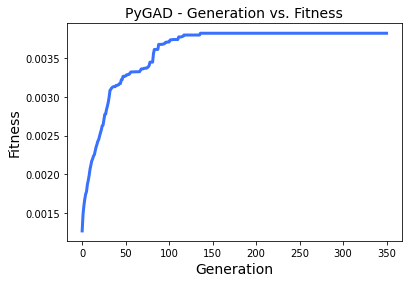


Smallest Distance: 263.30960228168306 
Solution: [28.  1. 13. 26.  6. 27.  4. 15. 16. 34. 36. 35. 32. 31. 44. 49. 48. 30.
 47. 41. 42. 12. 14. 20. 11.  9.  8. 18. 23. 24. 25.  3.  7.  2. 46. 33.
 10. 21. 50. 22. 38. 39. 40. 17. 37. 19. 45. 43.  5. 29.] 



In [5]:
fn = input("Enter file name: ")
cities = pd.read_csv(fn, index_col=0)
# Assigns N to the number of cities 
N = len(cities)

# view data set
#print("Working set: ")
#display(cities)

sol = solution()
print(f"Maximum number of routes for N = {N}: {maxpaths(N)}\n\nStarting Solution:\n {sol}\n")
sol = ga() 



<h2>Delivery Route</h2>

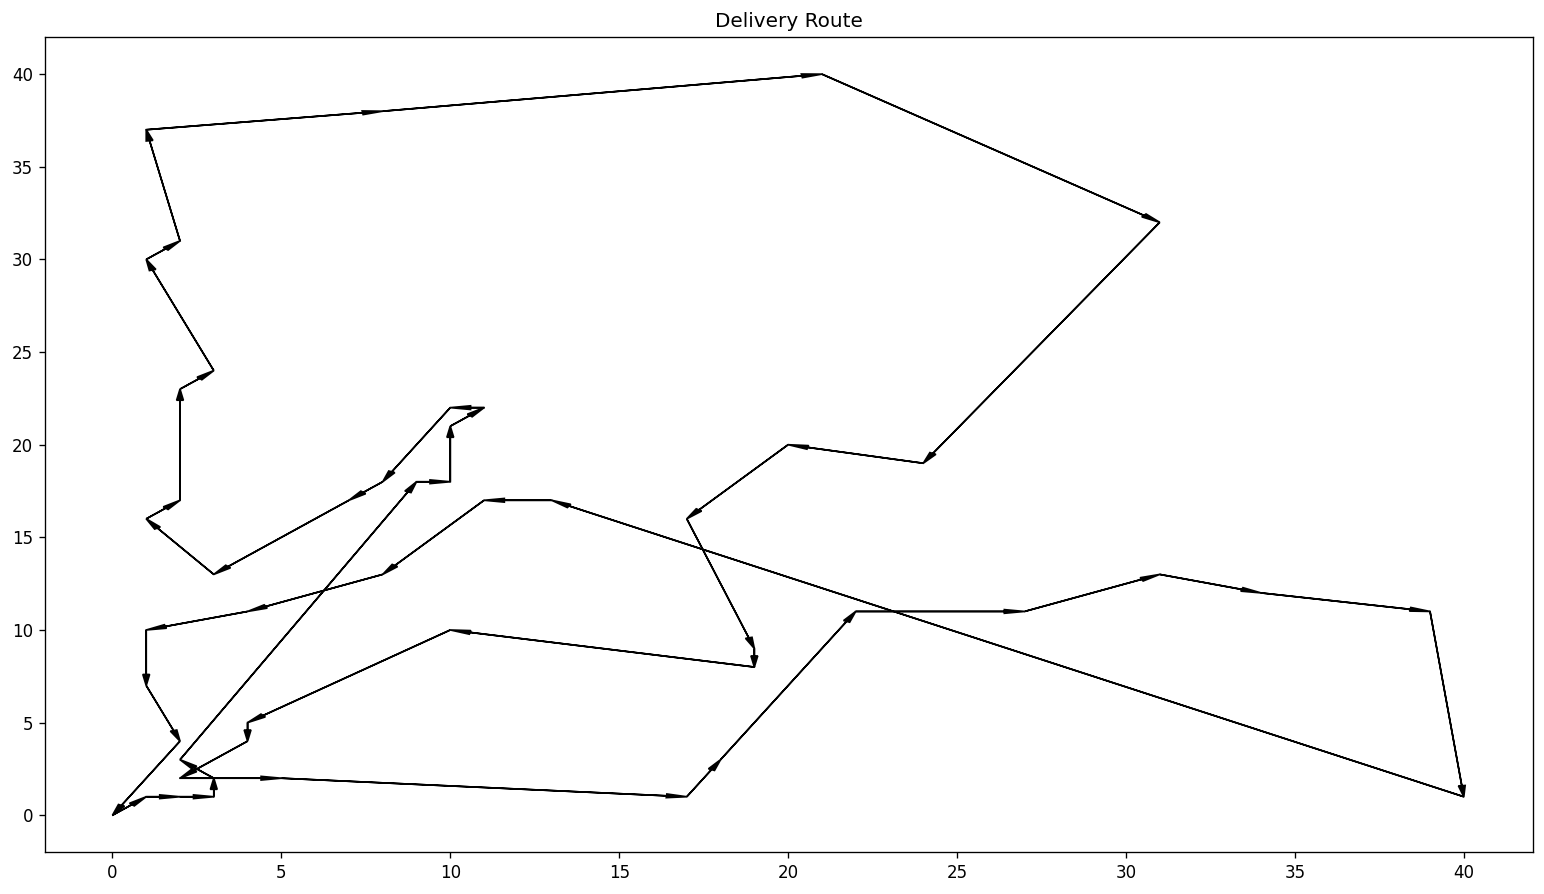

In [6]:
printsol(sol)